# PyStock Analyzer
---
### Algorithmic Trading program

This program implements algorithmic trading strategies to automate the buying and selling of financial instruments. It uses various technical indicators and market data to make trading decisions. The program is designed to execute trades based on predefined rules and parameters.


### Create a virtual environment, install requirements and import necessary libraries:



In [6]:
import yfinance as yf

# import finplot as fplt

import yahoo_fin.stock_info as yfin
from yfinance import Tickers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta
import pandas_datareader as pdr
import pytictoc as tt

### Define Ticker Class:
---
Using the yfinance API we can create our own Ticker class with all of the data and modules of the API available to us along with our own.

In [14]:
class Ticker:
    def __init__(self, symbol, start=pd.to_datetime('today') - pd.DateOffset(months=12), end=pd.to_datetime('today')):
        self.symbol = symbol
        self.start = start
        self.end = end
        if '.' in self.symbol:
            self.symbol = self.symbol.replace('.', '-')
        self.df = yf.download(self.symbol, self.start, self.end, progress=False)
        if self.df.empty:
            print("No data found for ", self.symbol)
            sys.exit(1)
        else:
            self.Ticker = yf.Ticker(self.symbol)
            self.actions = self.Ticker.get_actions()
            # self.analysis = self.Ticker.get_analysis()
            self.balance = self.Ticker.get_balance_sheet()
            self.calendar = self.Ticker.get_calendar()
            self.cf = self.Ticker.get_cashflow()
            self.info = self.Ticker.get_info()
            self.inst_holders = self.Ticker.get_institutional_holders()
            self.news = self.Ticker.get_news()
            self.recommendations = self.Ticker.get_recommendations()
            # self.sustainability = self.Ticker.get_sustainability()

    def __str__(self):
        return self.symbol

    def __repr__(self):
        return self.symbol


### Get Financial Data

In [20]:
class Signals:

    def __init__(self, ticker):
        self.ticker = ticker
        self.data = self.ticker.Ticker.history(period="1y")
        self.data['SMA_20'] = ta.trend.sma_indicator(self.data['Close'], window=20)
        self.data['SMA_50'] = ta.trend.sma_indicator(self.data['Close'], window=50)
        self.data['SMA_200'] = ta.trend.sma_indicator(self.data['Close'], window=200)
        self.data['RSI'] = ta.momentum.rsi(self.data['Close'])
        self.data['MACD'] = ta.trend.macd_diff(self.data['Close'])
        self.data['MACD_signal'] = ta.trend.macd_signal(self.data['Close'])
        self.data['MACD_hist'] = ta.trend.macd_diff(self.data['Close']) - ta.trend.macd_signal(self.data['Close'])
        self.data['Bollinger'] = ta.volatility.bollinger_hband(self.data['Close'])
        self.data['Bollinger'] = ta.volatility.bollinger_lband(self.data['Close'])
        self.data['Bollinger'] = ta.volatility.bollinger_mavg(self.data['Close'])
        self.data['Bollinger'] = ta.volatility.bollinger_hband_indicator(self.data['Close'])
        self.data['Bollinger'] = ta.volatility.bollinger_lband_indicator(self.data['Close'])
        self.data['Bollinger'] = ta.volatility.bollinger_wband(self.data['Close'])
        self.data['Bollinger'] = ta.volatility.bollinger_wband(self.data['Close'])

    def __str__(self):
        return self.ticker.symbol

    def __repr__(self):
        return self.ticker.symbol

    def plot(self):
        plt.figure(figsize=(12, 8))

        plt.legend(loc='upper left')
        plt.title(f'{self.ticker.symbol} Close Price History')



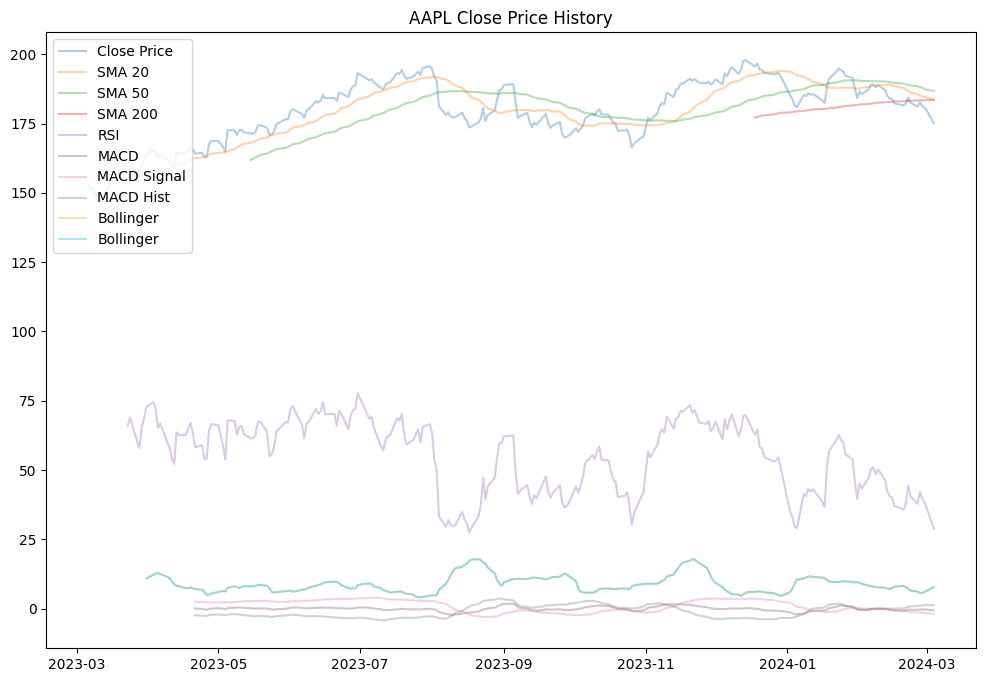

In [21]:
aapl = Ticker('AAPL')

sig = Signals(aapl)
sig.plot()

## Fundamental Analysis
---
[Piotroski F-score](https://en.wikipedia.org/wiki/Piotroski_F-score)
